### Will It Rain Tomorrow?
We will predict if it will rain tomorrow in Australia. This is a classification problem as we are predicting whether it will Rain or Not Rain.

##### Table of Contents
Data Preprocessing and Exploratory Data Analysis
Random Forest
Logistic Regression
Comparison Between Random Forest and Logistic Regression
Conclusion

#### Data Preprocessing and Exploratory Data Analysis
Import Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#load data
rain_data=pd.read_csv("weatherAUS.csv")
rain_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


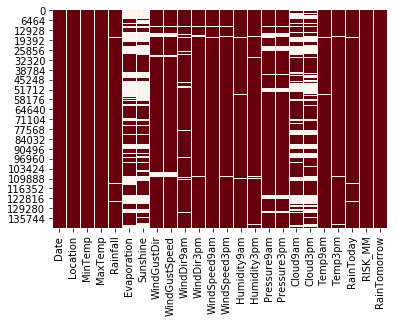

In [3]:
#visualizing missing data in the dataset
sns.heatmap(rain_data.isnull(), yticklabels='auto',cbar=False,cmap='Reds_r')
#cmap : matplotlib colormap name
#cbar : boolean, optional. Whether to draw a colorbar

In [4]:
# High percentage of missing data for Evaporation, Sunshine, Cloud9am and Cloud3pm features.
# Date, Location and RISK_MM will be removed.
# Lastly, remove any observations/rows with missing data
rain_data.drop(['Evaporation','Sunshine','Cloud9am','Cloud3pm','RISK_MM','Date','Location'],axis=1,inplace=True)
rain_data.dropna(inplace=True)
rain_data[['RainTomorrow','RainToday']] = rain_data[['RainTomorrow','RainToday']].replace({'No':0,'Yes':1})

In [5]:
rain_data.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


Rain vs. No Rain

0    87906
1    25019
Name: RainTomorrow, dtype: int64


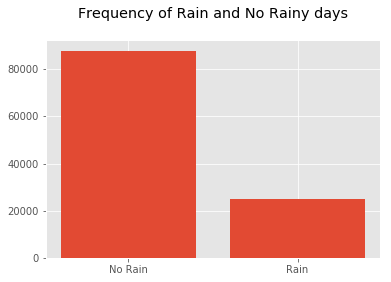

In [6]:
# Frequency of Rainy and No Rain:
mpl.style.use('ggplot')
plt.figure(figsize=(6,4))
plt.hist(rain_data['RainTomorrow'],bins=2,rwidth=0.8)
plt.xticks([0.25,0.75],['No Rain','Rain'])
plt.title('Frequency of Rain and No Rainy days\n')
print(rain_data['RainTomorrow'].value_counts())

Histogram of the numerical features:

(0, 100)

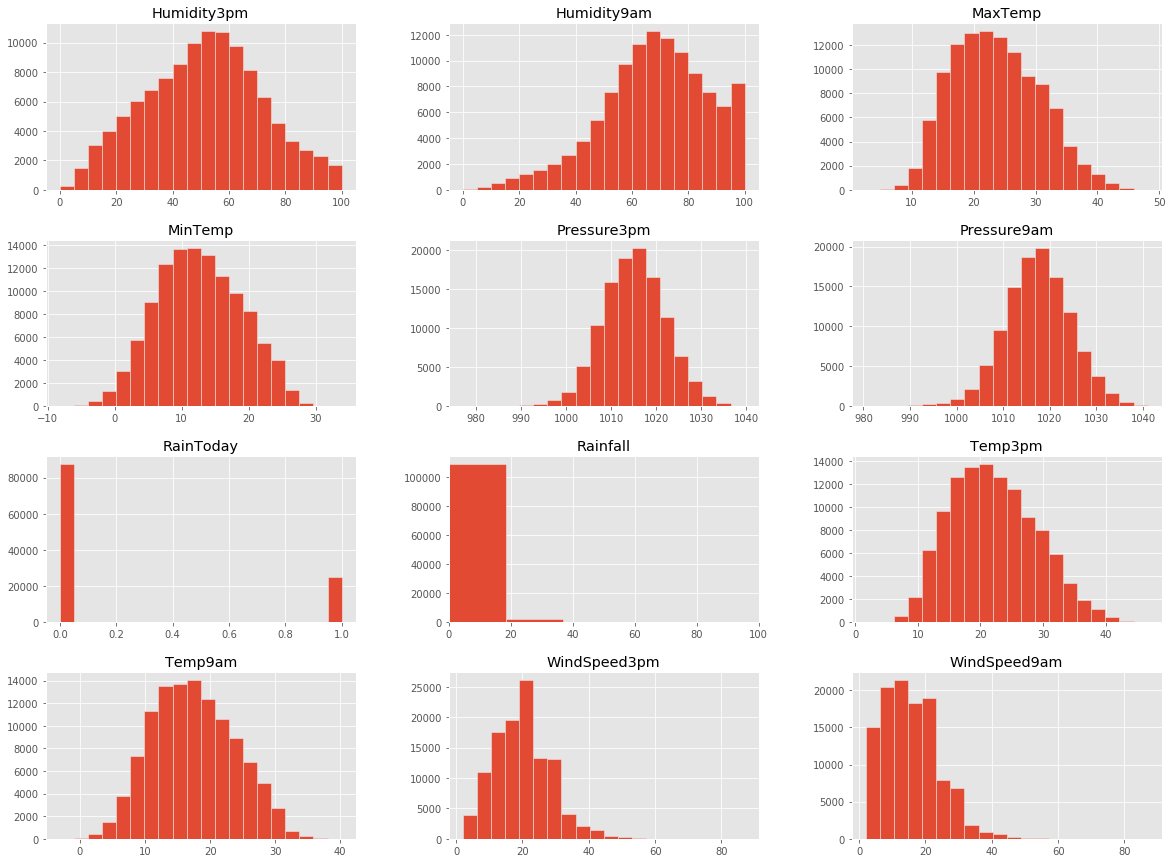

In [7]:
# Segregating our numerical features from the categorical
rain_data_num = rain_data[['MinTemp','MaxTemp','Rainfall','WindSpeed9am','WindSpeed3pm',
                           'Humidity9am','Humidity3pm','Pressure9am','Pressure3pm',
                           'Temp9am','Temp3pm','RainToday','RainTomorrow']]

# Histogram of each numerical feature
mpl.rcParams['patch.force_edgecolor'] = True
ax_list = rain_data_num.drop(['RainTomorrow'],axis=1).hist(figsize=(20,15),bins=20)
ax_list[2,1].set_xlim((0,100))

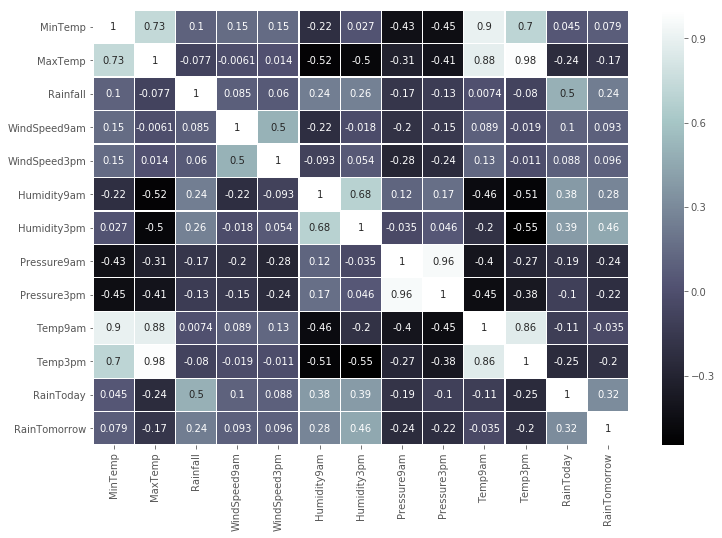

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(rain_data_num.corr(),annot=True,cmap='bone',linewidths=0.25)
#annot : If True, write the data value in each cell. If an array-like with the same shape as `data`, then use this to annotate the heatmap instead of the raw data.
#cmap : matplotlib colormap name or object, or list of colors
#linewidths : float, optional.Width of the lines that will divide each cell

Categorical Features and Dummy Variables

In [9]:
# Creating dummy variables for the categorical features:
WindGustDir_data = pd.get_dummies(rain_data['WindGustDir'])
WindDir9am_data = pd.get_dummies(rain_data['WindDir9am'])
WindDir3pm_data = pd.get_dummies(rain_data['WindDir3pm'])

# Dataframe of the categorical features
rain_data_cat = pd.concat([WindGustDir_data,WindDir9am_data,WindDir3pm_data],
                          axis=1,keys=['WindGustDir','WindDir9am','WindDir3pm'])

# Combining the Numerical and Categorical/Dummy Variables
rain_data = pd.concat([rain_data_num,rain_data_cat],axis=1)
#axis : {0/'index', 1/'columns'}, default 0The axis to concatenate along
#keys : sequence, default None

Splitting Data by Train and Test Data

In [10]:
from sklearn.model_selection import train_test_split

X = rain_data.drop(['RainTomorrow'],axis=1)
y = rain_data['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=88)

###  2. Random Forest

Instantiate the Random Forest classifier, fit then predict

In [11]:
from sklearn.ensemble import RandomForestClassifier

# Out of Bag (oob) set to True. We will compare the oob_score with accuracy to see if they differ by much
# n_estimators, or number of decision trees set to 100
rf=RandomForestClassifier(n_estimators=100,oob_score=True,random_state=88)
rf.fit(X_train,y_train)
y_rf_pred=rf.predict(X_test)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Null Accuracy

In [12]:
# No Rain and Rain frequency in test set
print(y_test.value_counts())
null_accuracy = float(y_test.value_counts().head(1) / len(y_test))
print('Null Accuracy Score: {:.2%}'.format(null_accuracy))

0    26292
1     7586
Name: RainTomorrow, dtype: int64
Null Accuracy Score: 77.61%


If we built a model that guesses 'No Rain' every time, then we would obtain the 'Null Accuracy' or 'Baseline Accuracy' of 77.6%

Random Forest result

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
print('Accuracy Score: {:.2%}'.format(accuracy_score(y_test,y_rf_pred),'\n'))
print('Out of Bag Accuracy Score: {:.2%}'.format(rf.oob_score_),'\n')
print('Confusion Matrix:\n',confusion_matrix(y_test,y_rf_pred))

Accuracy Score: 84.98%
Out of Bag Accuracy Score: 84.89% 

Confusion Matrix:
 [[25136  1156]
 [ 3933  3653]]


Accuracy Rate is 84.98%, however the Baseline Accuracy is 77.6%. Still some improvement though. The False Positives (3,933) are greater than the True Positives (3,653). Let's try and make our model simplier through feature selection as there are 60 features. Then we will try and improve the True Positive Rate.

##### Which Features Add Value?
Feature selection (reducing the number of variables) will make our model simplier and reduce the chances of overfitting. We don't want to use variables that don't any or much value when it comes training our model to predict the out-of-sample data.

In [14]:

# Using feature_importance_ for feature selection
feature_importance_rf = pd.DataFrame(rf.feature_importances_,index=X_train.columns,columns=['Importance']).sort_values(['Importance'],ascending=False)
feature_importance_rf.head(5)


,Importance
Humidity3pm,0.178917
Pressure3pm,0.079211
Humidity9am,0.073725
Pressure9am,0.071915
Temp3pm,0.066669


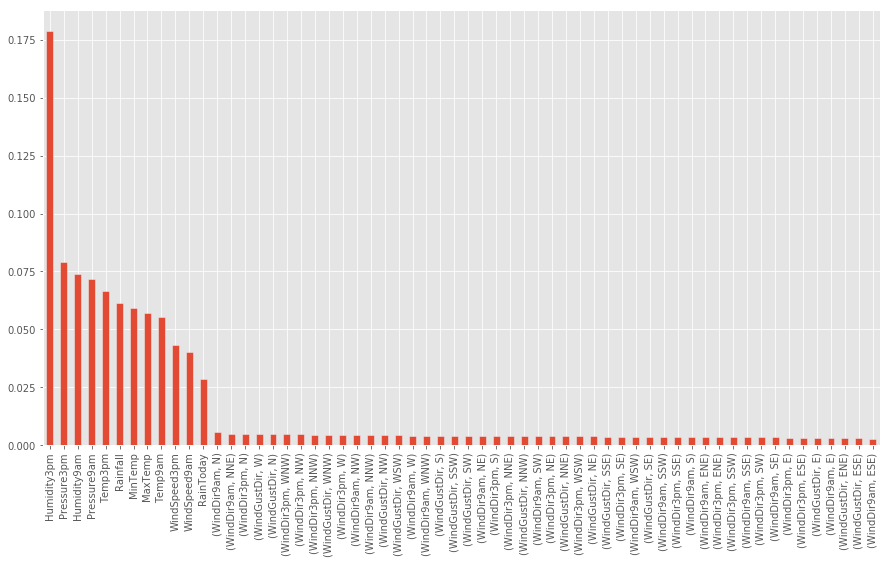

In [15]:
# Plot feature_importance
#kind :-'bar': vertical bar plot,,'line': line plot (default)#kind is types plots 
#figsize : a tuple (width, height) in inches
#legend : False/True/'reverse' .Place legend on axis subplots
feature_importance_rf.plot(kind='bar',legend=False,figsize=(15,8))

Remember our Categorical Variables: WindGustDir,WindDir9am,WindDir3pm, were transformed into dummy variables to make the Random Forest algorithm perform better. Because they were transformed into dummy variables, then they would appear to rank low under the important features as plotted above.

To see whether the Categorical Variables: WindGustDir,WindDir9am,WindDir3pm, add much value to our model, we will compute the accuracy rate for the Random Forest using only the top 5 features, and compare it with the accuracy rate for the Random Forest using the top 5 features as well as the Categorical Variables.

Train Random Forest with the subset of features. Then, predict.

Random Forest Top 5 Features Result:

In [16]:
#our top 5 features
feature_top_5=list(feature_importance_rf.index[0:6])

# X dataframe - with only the top 5 features
subset_1=[X.columns.get_loc(x) for x in feature_top_5]

#split train predict
X_train,X_test,y_train,y_test=train_test_split(X.iloc[:,subset_1],y,test_size=0.30,random_state=88)
rf.fit(X_train,y_train)
y_rf_pred=rf.predict(X_test)
print('Accuracy Score: {:.2%}'.format(accuracy_score(y_test,y_rf_pred)))
print('Out of Bag Score {:.2%}:'.format(rf.oob_score_),'\n')
print('Confusion Matrix:\n',confusion_matrix(y_test,y_rf_pred))

Accuracy Score: 84.23%
Out of Bag Score 84.23%: 

Confusion Matrix:
 [[24882  1410]
 [ 3931  3655]]


Random Forest Top 5 Features with Categorical (Dummy) Variables Result:

In [17]:
# X dataframe - with top 5 features and the categorical variables
subset_2 = subset_1 + list(range(12,len(X.columns)))

# Split, Train, Predict
X_train, X_test, y_train, y_test = train_test_split(X.iloc[:,subset_2], y, test_size=0.30, random_state=88)
rf.fit(X_train,y_train)
y_rf_pred = rf.predict(X_test)

print('Accuracy Score: {:.2%}'.format(accuracy_score(y_test,y_rf_pred)))
print('Out of Bag Score {:.2%}:'.format(rf.oob_score_),'\n')
print('Confusion Matrix:\n',confusion_matrix(y_test,y_rf_pred))


Accuracy Score: 84.68%
Out of Bag Score 84.65%: 

Confusion Matrix:
 [[25059  1233]
 [ 3957  3629]]


From here we can conclude that the categorical features do not add significant amount of value to the accuracy rate. Therefore we can remove the categorical features.

##### How many features should we use?
There's no one right answer to this. To help us choose what number of features to use, we will visualise the relationship between number of features used vs. accuracy rate.

In [18]:
%%time 

# Up to what number of features to plot
index = np.array(list(range(2,9)) + [15, 30, 60])

# creating list of index location
features = list(feature_importance_rf.index)
features = [X.columns.get_loc(x) for x in features]

# instantiate classifier
rf = RandomForestClassifier(n_estimators=100,random_state=88)

accuracy_rate = []

# append the accuracy rate
for i in index:
    X_train, X_test, y_train, y_test = train_test_split(X.iloc[:,features[0:i]], y, test_size=0.30, random_state=88)
    rf.fit(X_train,y_train)
    y_rf_pred = rf.predict(X_test)    
    accuracy_rate.append(accuracy_score(y_test,y_rf_pred))

Wall time: 8min 10s


Text(0.5,1,'Random Forest \nAccuracy Rate vs. Number of Features')

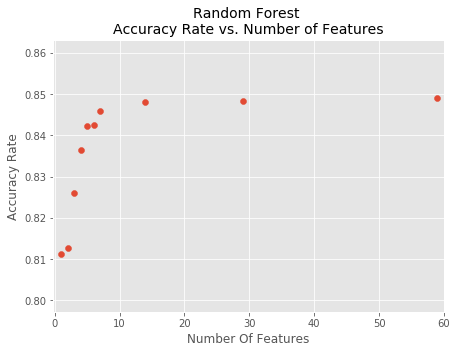

In [19]:
#plot accuracy vs number of features
plt.figure(figsize=(7,5))
plt.scatter(x=index-1,y=accuracy_rate)

plt.ylabel('Accuracy Rate',fontsize=12)
plt.xlabel('Number Of Features',fontsize=12)
plt.xlim(-0.2,60)
plt.title('Random Forest \nAccuracy Rate vs. Number of Features', fontsize = 14)

As you can see, there is not much improvement to the accuracy rate when the number of features are at 5 or more. To keep our model simple, we will use 7 features instead of 59. The accuracy rate from 7 to 59 features differs by only 0.68%.

In [20]:
#split train predict on 7 features
X_train,X_test,y_train,y_test=train_test_split(X[feature_importance_rf.head(7).index],y,test_size=0.33,random_state=88)
rf.fit(X_train,y_train)

y_rf_pred = rf.predict(X_test)
cm = pd.DataFrame(confusion_matrix(y_test,y_rf_pred), index=['NO RAIN','RAIN'],columns=['NO RAIN','RAIN'])


Confusion Matrix with simplier Random Forest model (Top 7 Features)

Accuracy Score (Top 7 Features): 84.52% 



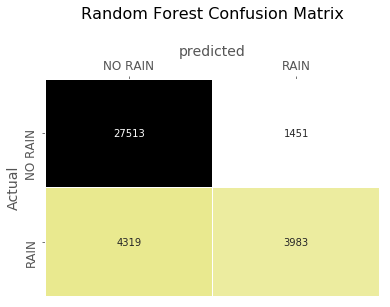

In [21]:
print('Accuracy Score (Top 7 Features): {:.2%}'.format(accuracy_score(y_test,y_rf_pred)),'\n')

#plot confusion matrix
fig=plt.figure(figsize=(6,4))
ax=sns.heatmap(cm,annot=True,cbar=False,cmap='CMRmap_r',linewidths=0.5,fmt='.0f')

ax.set_title('Random Forest Confusion Matrix',fontsize=16,y=1.25)
ax.set_ylabel('Actual',fontsize=14)
ax.set_xlabel('predicted',fontsize=14)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize=12)

In [22]:
TP = cm.iloc[1,1] # True Positive - Predicted Rain Correctly
TN = cm.iloc[0,0] # True Negative - Predicted No Rain Incorrectly
FP = cm.iloc[0,1] # False Positive - Predicted Rain when it didn't rain
FN = cm.iloc[1,0] # False Negative - Predicted No Rain when it did rain

##### Sensitivty vs. Specificity
###### Sensitivity: When it rains, how often are our predictions correct?
###### Specificity: When it does not rain, how often are our predictions correct?

In [23]:
print('*Sensitivity: {:.2%}'.format(TP/(FN+TP)))
print('*Specificity: {:.2%}'.format(TN/(FP+TN)))

*Sensitivity: 47.98%
*Specificity: 94.99%


Of the time it rained, we have correctly predicted Rain 47.98% of the time. Of the time it did not rain, we have correctly predicted No Rain 94.99% of the time. Considering it doesn't rain 77.6% of the time, you would expect the specificity rate to be higher.




#### Probability Score of Rain and No Rain from the Random Forest
The Random Forest algorithm produces a probability score (the proportion of votes of the trees in the ensemble) in order to make classification. Let's visualise the probability scores for Rain vs. No Rain.

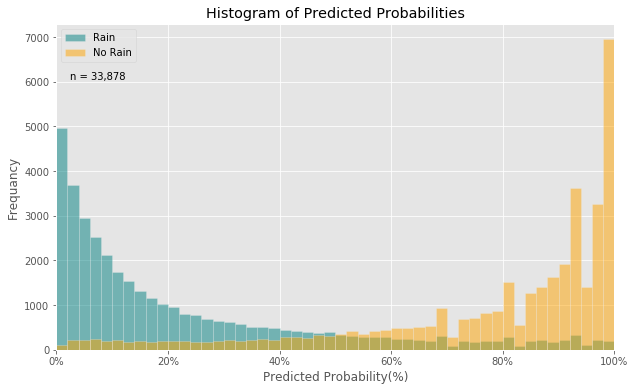

In [24]:
# proves np.array of the probability scores
y_prob_rain=rf.predict_proba(X_test)

# To convert x-axis to a percentage
from matplotlib.ticker import PercentFormatter

#Plot histogram of predicted probabilities
fig,ax=plt.subplots(figsize=(10,6))
plt.hist(y_prob_rain[:,1],bins=50,alpha=0.5,color='Teal',label='Rain')
plt.hist(y_prob_rain[:,0],bins=50,alpha=0.5,color='Orange',label="No Rain")
plt.xlim(0,1)

plt.title("Histogram of Predicted Probabilities")
plt.xlabel("Predicted Probability(%)")
plt.ylabel("Frequancy")
ax.xaxis.set_major_formatter(PercentFormatter(1))
ax.text(0.025,0.83,'n = 33,878',transform=ax.transAxes)

plt.legend()

The Random Forest classication model uses 50% as the threshold for classification. Meaning that if probability of Rain is > 50%, it would predict Rain or assign a value of 1. Else if, the probability of Rain is < 50%, it would predict No Rain or assign a value of 0.

Because of the binary relationship between Rain and No Rain, the histogram has the highest frequency at 0% for Rain and 100% for No Rain.

But what if, the cost of a False Negative is greater than a False Positive? That is, the cost of it actually raining and predicting that it won't rain, is greater than the cost of when it does not rain when we have predicted that it will rain.

The 50% threshold can be reduced in order to increase the sensitivity rate. However this will reduce the specificity rate because there is an inverse relationship between sensitivity and specificity.

#### ROC Curve (True Positive vs. False Positive Rate) and Threshold Curve for the Random Forest Model¶


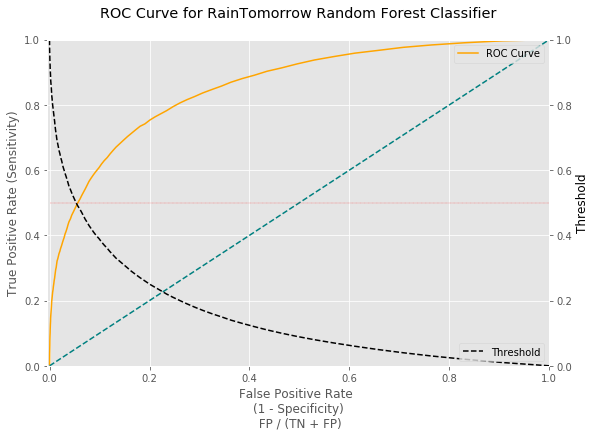

In [25]:
#ROC Curve
fpr, tpr, thresholds = roc_curve(y_test,y_prob_rain[:,1])

fig,ax1 = plt.subplots(figsize=(9,6))
ax1.plot(fpr, tpr,color='orange')
ax1.legend(['ROC Curve'],loc=1)
ax1.set_xlim([-0.005, 1.0])
ax1.set_ylim([0,1])
ax1.set_ylabel('True Positive Rate (Sensitivity)')
ax1.set_xlabel('False Positive Rate \n(1 - Specificity)\n FP / (TN + FP)')
ax1.set_title('ROC Curve for RainTomorrow Random Forest Classifier\n')

plt.plot([0,1],[0,1],linestyle='--',color='teal')
plt.plot([0,1],[0.5,0.5],linestyle='--',color='red',linewidth=0.25)

#Threshold Curve
ax2 = plt.gca().twinx()
ax2.plot(fpr, thresholds, markeredgecolor='r',linestyle='dashed', color='black')
ax2.legend(['Threshold'],loc=4)
ax2.set_ylabel('Threshold',color='black')
ax2.set_ylim([0,1])
ax2.grid(False)

The default threshold is 50%, which had resulted in a low sensitivity rate of 47.76% and specificity of 94.78%. Now will change the threshold so that it provides a higher sensitivity rate at the cost of a lower specificity rate.



### Selecting The Threshold Rate

In [26]:
# Function to calc sensitivity and specificity rate for a given threshold
def evaluate_threshold(threshold):
    print('Sensitivity: {:.2%}'.format(tpr[thresholds > threshold][-1]))
    print('Specificity: {:.2%}'.format(1 - fpr[thresholds > threshold][-1]))
    
evaluate_threshold(0.25)

Sensitivity: 74.19%
Specificity: 80.91%


We will reduce the threshold from 50% to 25%.
If the probability of Rain is > 25%, the model will predict Rain (for tomorrow). If the probability of Rain is < 25%, the model will predict No Rain (for tomorrow).


### Confusion Matrix with simplier Random Forest model (top 7 Features) and threshold rate set to 25%

Accuracy Score (Top 7 Features with 25% Threshold): 79.41% 



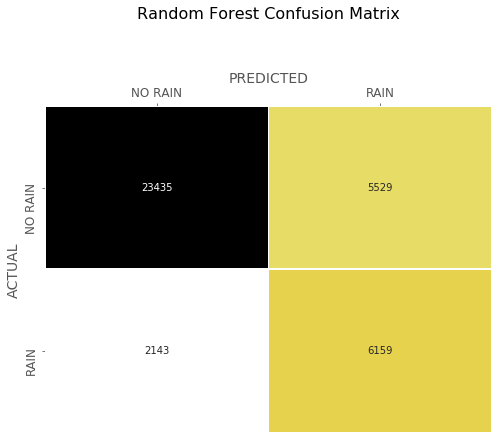

In [27]:
from sklearn.preprocessing import binarize
# change the predicted class with 25% threshold
y_pred_class = binarize(y_prob_rain,0.25)[:,1]

cm = pd.DataFrame(confusion_matrix(y_test,y_pred_class), index=['NO RAIN','RAIN'],columns=['NO RAIN','RAIN'])

print('Accuracy Score (Top 7 Features with 25% Threshold): {:.2%}'.format(accuracy_score(y_test,y_pred_class)),'\n')

# Plot Confusion Matrix
fig = plt.figure(figsize=(8,6))
ax = sns.heatmap(cm,annot=True,cbar=False, cmap='CMRmap_r',linewidths=0.5,fmt='.0f')
ax.set_title('Random Forest Confusion Matrix',fontsize=16,y=1.25)
ax.set_ylabel('ACTUAL',fontsize=14)
ax.set_xlabel('PREDICTED',fontsize=14)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize=12)

In [28]:
TP = cm.iloc[1,1] # True Positive - Predicted Rain Correctly
TN = cm.iloc[0,0] # True Negative - Predicted No Rain Incorrectly
FP = cm.iloc[0,1] # False Positive - Predicted Rain when it didn't rain
FN = cm.iloc[1,0] # False Negative - Predicted No Rain when it did rain

sens_rf = TP/(FN+TP)
spec_rf = TN/(FP+TN)

print('Sensitivity: {:.2%}'.format(sens_rf))
print('Specificity: {:.2%}'.format(spec_rf))

Sensitivity: 74.19%
Specificity: 80.91%


Of the time it rained, we have correctly predicted Rain 74.26% of the time. Of the time it did not rain, we have correctly predicted No Rain 81.16% of the time.

### AUC for Random Forest
The AUC is the Area Under the ROC Curve. If the model produces a high sensitivity and specificity rate (which is what you would want to achieve), then the ROC curve will be stretched towards the top left of the x-y axis. The AUC provides in indication on how well the model had performed in comparison to another model.

In [29]:
rf_auc = roc_auc_score(y_test,y_prob_rain[:,1])
print('AUC Score: {:.2%}'.format(rf_auc))

AUC Score: 85.86%


### Logistic Regression
#### Train and Predict using the entire number of features

In [30]:
#Libraries for the Logistic Regression 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

X = rain_data.drop(['RainTomorrow'],axis=1)
y = rain_data['RainTomorrow']
# Remove the Categorical (Dummy) Variables, as we have identified earlier that they do not add much value
X = X.iloc[:,0:12] 


# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=88)

# Logistic Regression train
lr = LogisticRegression(random_state=88, solver='liblinear')
lr.fit(X_train,y_train)

# predict
y_lr_pred = lr.predict(X_test)

#### Logistic Regression result using all the features:

In [31]:
# The 10-Fold Cross Validation method is used to calculate the accuracy score of the Logistic Regression model.
print('Accuracy Score with 10-KFolds: {:.2%}'.format(cross_val_score(lr,X,y,cv=10,scoring='accuracy').mean()),'\n')
print('Confusion Matrix:\n',confusion_matrix(y_test,y_lr_pred))

Accuracy Score with 10-KFolds: 83.46% 

Confusion Matrix:
 [[24978  1314]
 [ 4309  3277]]


#### Feature Selection - using Recursive Feature Elimination (RFE)
"Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a featureimportances attribute. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached."

The Final Random Forest model used 7 features. We will have the same number of features for the Logistic Regression Model.



In [32]:
%%time
#Feature Selection Method: Recursive Feature Elimination 
rfe = RFE(estimator=lr, n_features_to_select=7)
rfe = rfe.fit(X_train,y_train)

print("Number of Features: {}".format(rfe.n_features_)) 
print("Selected Features: {}".format(rfe.support_))
print("Feature Ranking: {}".format(rfe.ranking_))

Number of Features: 7
Selected Features: [ True  True False False False False  True  True  True False  True  True]
Feature Ranking: [1 1 4 3 5 6 1 1 1 2 1 1]
Wall time: 13.9 s


#### The Selected 7 Features:


In [33]:
pd.DataFrame(X.iloc[:,rfe.support_].columns,columns=['Importance'])

,Importance
0,MinTemp
1,MaxTemp
2,Humidity3pm
3,Pressure9am
4,Pressure3pm
5,Temp3pm
6,RainToday


Train and Predict using the 7 chosen features

In [34]:

X_rfe = X.iloc[:,rfe.support_]
# Train Test split with subset of X features
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.30, random_state=88)
# Train and Predict
lr.fit(X_train,y_train)
y_lr_pred = lr.predict(X_test)


Logistic Regression result using the selected 7 features:

In [35]:

#accuracy rate using 10-Fold CV
accuracy_kfold = cross_val_score(lr,X_rfe,y,cv=10,scoring='accuracy').mean()
print('Accuracy Score with 7 Features and 10-KFolds: {:.2%}'.format(accuracy_kfold),'\n')
print('Confusion Matrix:\n',confusion_matrix(y_test,y_lr_pred))

Accuracy Score with 7 Features and 10-KFolds: 83.34% 

Confusion Matrix:
 [[25030  1262]
 [ 4373  3213]]


The coefficients and features in the Logistic Regression

In [36]:

pd.concat([pd.DataFrame(lr.coef_,index=['coefficient'],columns=X_train.columns).T, 
                         X_train.aggregate([np.mean,np.std,np.min,np.max]).T],axis=1)

,coefficient,mean,std,amin,amax
MinTemp,0.057006,12.676100,6.247474,-8.2,33.9
MaxTemp,0.157366,23.663009,6.971454,2.6,47.3
Humidity3pm,0.052899,50.671651,20.788517,0.0,100.0
Pressure9am,0.164079,1017.428763,7.047617,982.0,1041.0
Pressure3pm,-0.168719,1015.051918,6.967308,980.2,1039.6
Temp3pm,-0.218478,22.138219,6.829644,1.7,46.7
RainToday,0.967021,0.223981,0.416912,0.0,1.0


Confusion Matrix with simplier Logistic Regression model (7 Features)

Accuracy Score with 7 Features and 10-KFolds: 83.34% 



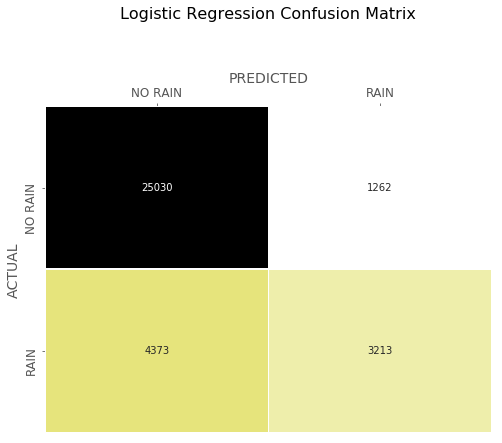

In [37]:

cm = pd.DataFrame(confusion_matrix(y_test,y_lr_pred), index=['NO RAIN','RAIN'],columns=['NO RAIN','RAIN'])

print('Accuracy Score with 7 Features and 10-KFolds: {:.2%}'.format(accuracy_kfold),'\n')

# Plot CM
fig = plt.figure(figsize=(8,6))
ax = sns.heatmap(cm,annot=True,cbar=False, cmap='CMRmap_r',linewidths=0.5,fmt='.0f')
ax.set_title('Logistic Regression Confusion Matrix',fontsize=16,y=1.25)
ax.set_ylabel('ACTUAL',fontsize=14)
ax.set_xlabel('PREDICTED',fontsize=14)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize=12)

In [38]:
TP = cm.iloc[1,1] # True Positive - Predicted Rain Correctly
TN = cm.iloc[0,0] # True Negative - Predicted No Rain Incorrectly
FP = cm.iloc[0,1] # False Positive - Predicted Rain when it didn't rain
FN = cm.iloc[1,0] # False Negative - Predicted No Rain when it did rain

print('Sensitivity: {:.2%}'.format(TP/(FN+TP)))
print('Specificity: {:.2%}'.format(TN/(FP+TN)))

Sensitivity: 42.35%
Specificity: 95.20%


Of the time it rained, we have correctly predicted Rain 42.35% of the time. Of the time it did not rain, we have correctly predicted No Rain 95.20% of the time. Like what we did before, assuming the cost of False Positive is greater than False Negative, we will adjust the threshold level to 25%.


### ROC Curve and Threshold Curve for the Logistic Regression Model

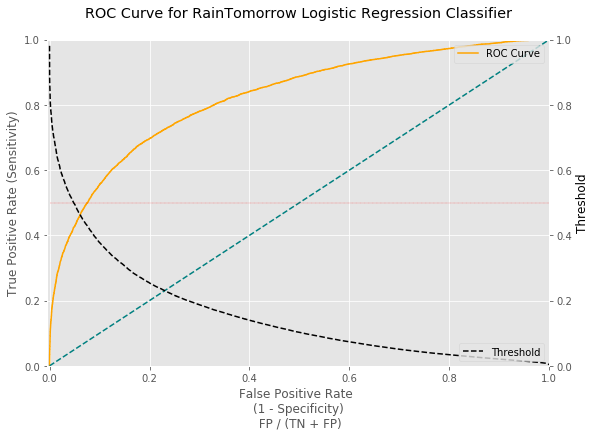

In [39]:
# Probability of Rain for X_test
y_prob_rain = lr.predict_proba(X_test)

fpr, tpr, thresholds = roc_curve(y_test,y_prob_rain[:,1])

#ROC Curve
fig,ax1 = plt.subplots(figsize=(9,6))
ax1.plot(fpr, tpr,color='orange')
ax1.legend(['ROC Curve'],loc=1)
ax1.set_xlim([-0.005, 1.0])
ax1.set_ylim([0,1])
ax1.set_ylabel('True Positive Rate (Sensitivity)')
ax1.set_xlabel('False Positive Rate \n(1 - Specificity)\n FP / (TN + FP)')
ax1.set_title('ROC Curve for RainTomorrow Logistic Regression Classifier\n')

plt.plot([0,1],[0,1],linestyle='--',color='teal')
plt.plot([0,1],[0.5,0.5],linestyle='--',color='red',linewidth=0.25)

#Threshold Curve
ax2 = plt.gca().twinx()
ax2.plot(fpr, thresholds, markeredgecolor='r',linestyle='dashed', color='black')
ax2.legend(['Threshold'],loc=4)
ax2.set_ylabel('Threshold',color='black')
ax2.set_ylim([0,1])
ax2.grid(False)

#### Confusion Matrix with simplier Logistic Regression model (7 Features) and 25% threshold

Accuracy Score (Top 7 Features with 25% Threshold): 77.40% 



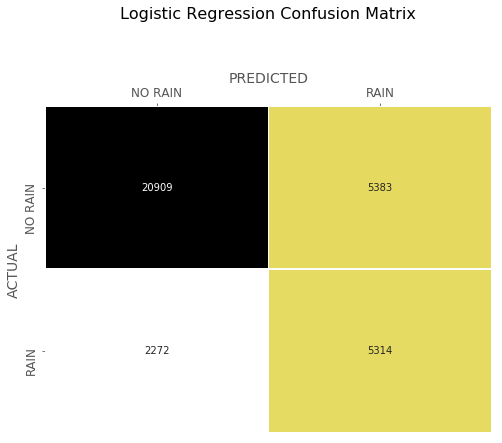

In [40]:

# Changing predictions using threshold of 25%
y_pred_class = binarize(y_prob_rain,0.25)[:,1]

cm = pd.DataFrame(confusion_matrix(y_test,y_pred_class), index=['NO RAIN','RAIN'],columns=['NO RAIN','RAIN'])

print('Accuracy Score (Top 7 Features with 25% Threshold): {:.2%}'.format(accuracy_score(y_test,y_pred_class)),'\n')

fig = plt.figure(figsize=(8,6))
ax = sns.heatmap(cm,annot=True,cbar=False, cmap='CMRmap_r',linewidths=0.5,fmt='.0f')
ax.set_title('Logistic Regression Confusion Matrix',fontsize=16,y=1.25)
ax.set_ylabel('ACTUAL',fontsize=14)
ax.set_xlabel('PREDICTED',fontsize=14)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize=12)

In [41]:
TP = cm.iloc[1,1] # True Positive - Predicted Rain Correctly
TN = cm.iloc[0,0] # True Negative - Predicted No Rain Incorrectly
FP = cm.iloc[0,1] # False Positive - Predicted Rain when it didn't rain
FN = cm.iloc[1,0] # False Negative - Predicted No Rain when it did rain

sens_lr = TP/(FN+TP)
spec_lr = TN/(FP+TN)

print('Sensitivity: {:.2%}'.format(sens_lr))
print('Specificity: {:.2%}'.format(spec_lr))

Sensitivity: 70.05%
Specificity: 79.53%


Of the time it rained, we have correctly predicted Rain 70.05% of the time. Of the time it did not rain, we have correctly predicted No Rain 79.53% of the time.


# Comparison Between Random Forest and Logistic Regression Model
We will compare the results. The Area Under the ROC Curve is an indicator on which classifier model has the stronger performance.


In [42]:


lr_auc = cross_val_score(lr,X,y,cv=10,scoring='roc_auc').mean()

print('Null Accuracy Score: {:.2%}\n'.format(null_accuracy))
print('{:>30} {:>26}'.format('Random Forest','Logistic Regression'))
print('{} {:>17.2%} {:>22.2%}'.format('AUC Score',rf_auc,lr_auc))
print('{} {:>14.2%} {:>22.2%}'.format('Sensitivity*',sens_rf,sens_lr))
print('{} {:>14.2%} {:>22.2%}'.format('Specificity*',spec_rf,spec_lr))
print('\n*25% Threshold')

Null Accuracy Score: 77.61%

                 Random Forest        Logistic Regression
AUC Score            85.86%                 83.41%
Sensitivity*         74.19%                 70.05%
Specificity*         80.91%                 79.53%

*25% Threshold


# Conclusion
The Random Forest model is the better performer as the AUC is 85.83% vs. 83.41% for the Logistic Regression model.
From comparing accuracy rates, the Categorical Features: WindGustDir,WindDir9am,WindDir3pm, offered little value. We saw the increase in the accuracy rates from having 1 feature to 59 and chose 7 features as that was the approximate point at which the increase in accuracy rate was very small. Having less features would simplify the model, reduce chances of overfitting, and provide better interpretability.

Both the Random Forest and Logistic Regression had a low sensitivity rate which often incorrectly predicted that it won't rain the next day when it actually did rain.

The ROC and Threshold Curve demonstrates the relationshp between sensitivity and specificity at each threshold. Assuming that the cost of a False Positive was greater than a False Negative, we have chosen to reduce the threshold from 50% to 25%. This resulted in the sensitivity rate for the Random Forest model increasing from 47.76% to 74.26% at the trade-off of decreasing the specificity rate from 94.78% to 81.16%.

The features used in the Random Forest and Logistic Regression differ. Features used in the final model were:

Random Forest                 Logistic Regression
1. Humidity3pm                1. Humidity3pm
2. Pressure3pm                2. Pressure3pm
3. Humidity9am                3. RainToday
4. Pressure9am                4. Pressure9am
5. Temp3pm                    5. Temp3pm
6. Rainfall                   6. MaxTemp
7. MinTemp                    7. MinTemp